In [1]:
#pandas
import pandas as pd

#matplotlib
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

#plotly
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [2]:
#увеличим дефолтный размер графиков в дюймах
from pylab import rcParams
rcParams['figure.figsize'] = 10,10

<span style="color:red">**Визуализация 1:** </span><br>
Корреляция между количеством самолетов и рейтингом "военной мощи" страны

In [3]:
ratings_gf = pd.read_csv("GlobalFirePower.csv")

In [4]:
# Выбираем ранги и общее число самолетов

df1 = ratings_gf[['Rank', 'Total Aircraft Strength']]

# Считаем квантили и интерквантильный размах
q2 = df1['Total Aircraft Strength'].median()
q1 = df1['Total Aircraft Strength'].quantile(0.25)
q3 = df1['Total Aircraft Strength'].quantile(0.75)
iqr = q3 - q1

# Границы выбросов (outliers)
outliermin = max(q1 - 1.5*iqr, 0)
outliermax = q3 + 1.5*iqr

# Фильтруем выбросы
df1 = df1[(df1['Total Aircraft Strength'] <= outliermax) & (df1['Total Aircraft Strength'] >= outliermin)]

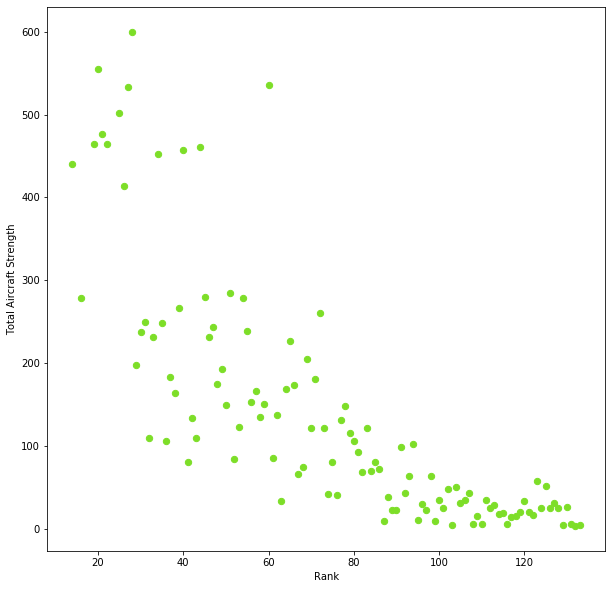

In [5]:
df1.plot.scatter(x='Rank', y = 'Total Aircraft Strength', s = [40] , c = '#7dde28')

In [6]:
#Корреляция
df1.corr()

,Rank,Total Aircraft Strength
Rank,1.000000,-0.786129
Total Aircraft Strength,-0.786129,1.000000


**ВЫВОД:** <br>
Видно, что страны с большим кол-вом самолетов имеют более высокий рейтинг "военной мощи"<br>
Точечные диаграммы используются при отображении степени зависимости между значениями

<span style="color:red">**Визуализация 2:** </span><br>
Колличество жертв в авиакатастрофах

In [7]:
air_crashes_pre = pd.read_csv("Airplane_Crashes_and_Fatalities.csv")
# Добавим год
# air_crashes_pre['Year'] = air_crashes_pre['Date'].apply(get_year)
air_crashes_pre['Year'] = air_crashes_pre['Date'].apply(lambda x: x[-4:])
# Добим все года
years_list = pd.DataFrame(list(range(1908,2019)), columns =['Year'])
years_list['Year']= years_list['Year'].astype(str)
air_crashes = years_list.merge(air_crashes_pre, how = 'left', on = 'Year')

In [8]:
df2 = air_crashes[['Year','Aboard','Fatalities']]
df2 = df2.fillna(0)
df2 = df2.\
groupby('Year', as_index = False ).\
agg({'Aboard':'sum', 'Fatalities':'sum'})
df2 = df2.rename(columns={'Aboard': 'Total Aboard', 'Fatalities': 'Total Fatalities'})

In [9]:
def plotly_line_plot(df, title = '', xline = 'Year'):
    data = []
    
    for column in df.columns:
        if column != xline:
            trace = go.Scatter(
                x = df[xline],
                y = df[column],
                mode = 'lines',
                name = column
            )
            data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

In [10]:
plotly_line_plot(
    df2,
    title = 'Total Aircrashes Fatalities by Year'
)

**ВЫВОД:** <br>
Видно, что:
* безопасность полетов в последнее время увеличивается;
* В авиакатастрофах почти всегда гибнут все пассажиры

Для временного периода удобно использовать LineChart

<span style="color:red">**Визуализация 3:** </span><br>
Количество авиакатастров по часам

In [11]:
air_crashes_pre['Hour'] = air_crashes_pre['Time'].apply(lambda x: str(x)[0:2])
air_crashes_pre = air_crashes_pre.loc[(pd.isnull(air_crashes_pre['Time']) != True)]
air_crashes_pre['Hour'] = air_crashes_pre['Hour'].astype(int)
air_crashes_pre = air_crashes_pre.\
loc[air_crashes_pre['Hour'].between(0,23)]
df3 = air_crashes_pre[['Hour', 'Date']].groupby('Hour').count()
df3 = df3.reset_index()
df3 = df3.rename(columns={'Date': 'Aircrashes Amount'})

In [12]:
colors = dict()
for i in range(0,24):
    if i < 6:
        colors[i] = 'black'
    elif i < 12:
        colors[i] = '#bdb1b1'
    elif i < 18:
        colors[i] = '#e3d5d5'
    else:
        colors[i] = '#996b6b'

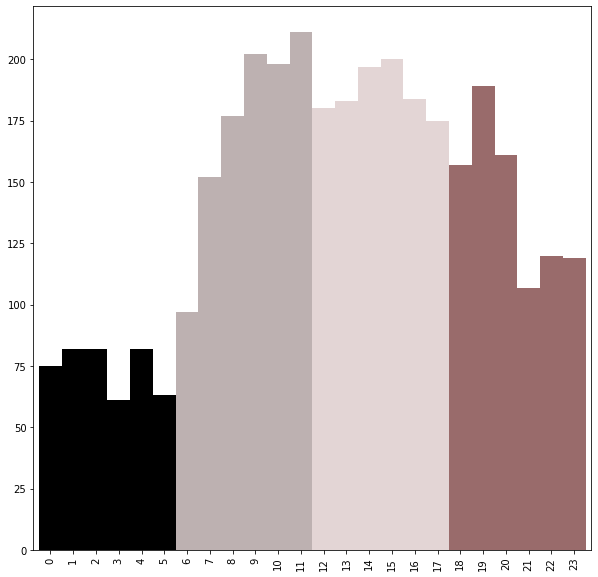

In [13]:
df3['Aircrashes Amount'].plot(kind='bar', width = 1, color=[colors[i] for i in df3['Hour']])

**ВЫВОД:** <br>
Видно, что меньше всего катастроф происходит ночью с 0 до 6 (**черный цвет**).Скорее всего из-за меньшего количества рейсов ночью. <br>
Для просмотра распределения величины удобно использовать BarHistogram

<span style="color:red">**Визуализация 4:** </span><br>
Шахматные партии: число ходов для победы в Королевском гамбите

In [14]:
chess_games = pd.read_csv("chessgames.csv")
chess_games = chess_games[['turns','rated','victory_status', 'winner','increment_code', 'opening_eco']]

In [15]:
# Отбираем партии сильных игроков с контролем времени "не пуля"
king_gambit = chess_games[(chess_games['rated'] == True)\
#& (chess_games['white_rating'] >= 1800)\
#& (chess_games['black_rating'] >= 1800)\
# Условие на контроль времени
& ((pd.to_numeric(chess_games['increment_code'].str[0]) > 1) | (len(chess_games['increment_code']) > 3))\
# Королевский гамбит
& (chess_games['opening_eco'].str[0] == 'C')\
& (pd.to_numeric(chess_games['opening_eco'].str[1:3]) > 29)\
& (pd.to_numeric(chess_games['opening_eco'].str[1:3]) < 40)\
# Уберем ничьи
& (chess_games['winner'] != 'draw')\
& (chess_games['victory_status'] != 'draw')]

In [16]:
# Отбираем партии сильных игроков с контролем времени "не пуля"
sicilian_defence = chess_games[(chess_games['rated'] == True)\
#& (chess_games['white_rating'] >= 1800)\
#& (chess_games['black_rating'] >= 1800)\
# Условие на контроль времени
& ((pd.to_numeric(chess_games['increment_code'].str[0]) > 1) | (len(chess_games['increment_code']) > 3))\
# Сицилианская защита
& (chess_games['opening_eco'].str[0] == 'B')\
& (pd.to_numeric(chess_games['opening_eco'].str[1:3]) > 19)\
#& (pd.to_numeric(chess_games['opening_eco'].str[1:3]) < 40)\
# Уберем ничьи
& (chess_games['winner'] != 'draw')\
& (chess_games['victory_status'] != 'draw')]

In [17]:
king_gambit_pivot = king_gambit.pivot_table(
                        index='victory_status', 
                        columns='winner', 
                        values='turns', 
                        aggfunc='mean').fillna(0).applymap(int)

In [18]:
sicilian_defence_pivot = sicilian_defence.pivot_table(
                        index='victory_status', 
                        columns='winner', 
                        values='turns', 
                        aggfunc='mean').fillna(0).applymap(int)

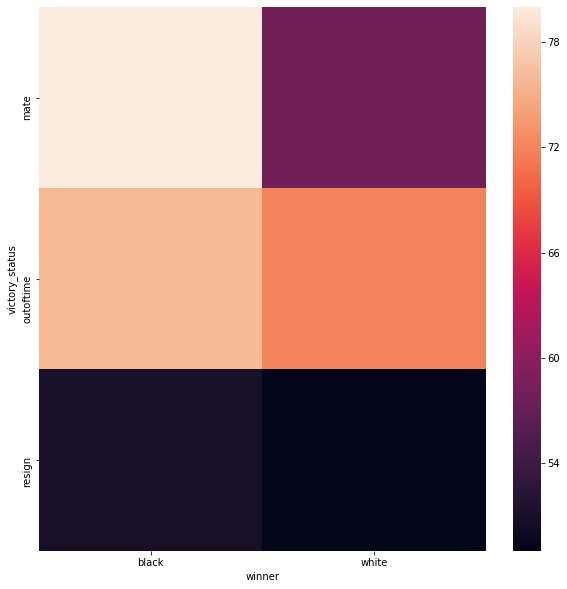

In [19]:
sns.heatmap(king_gambit_pivot)
#sns.heatmap(sicilian_defence_pivot)

**ВЫВОД:** <br>
В королевском гамбите белые в среднем побеждают за меньшее число ходов, чем черные:
* В партиях, где был поставлен мат: разница большая (либо белые быстро побеждают, либо долго обороняются в худшей позиции (обычно проигрывая в итоге))
* В партиях, где мат не был поставлен, разница в числе ходов незначительная

Хотелось использовать тепловую карту :-)

<span style="color:red">**Визуализация 5:** </span><br>
Самый популярный первый ход

In [20]:
chess_games2 = pd.read_csv("chessgames.csv")


In [21]:
def first_move(row):
    if row[0] != 'N':
        return row[0:2]
    # ходы конем, а не пешкой
    return row [0:3]

In [22]:
chess_games2['first_move'] = chess_games2['moves'].apply(first_move)
chess_games2 = chess_games2.groupby('first_move').count().reset_index()
chess_games2 = chess_games2[['first_move','moves']]

Text(0, 0.5, '')

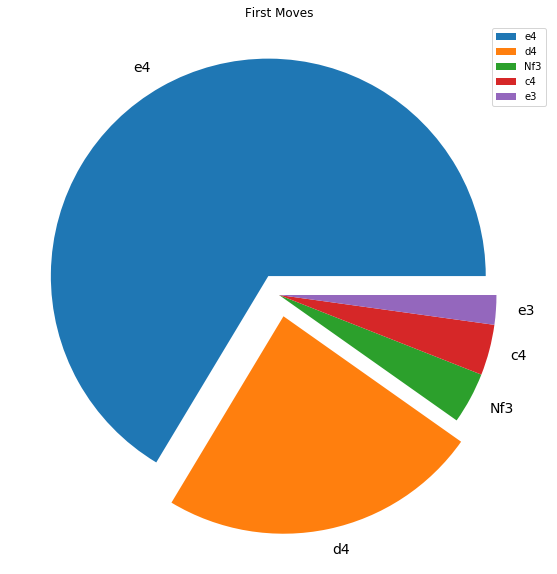

In [23]:
df5 = chess_games2.sort_values(by = 'moves', ascending = False).head()
explode = (0.1, 0.1, 0, 0, 0)
figure = df5.plot(kind = 'pie', y = 'moves', startangle=0, labels=df5['first_move'], legend = True, fontsize=14,\
         explode = explode, title = 'First Moves')
plt.ylabel('')

**ВЫВОД:** <br>
e4 - самый популярный первый ход <br>
С помощью Pie chart заметно, что доля этого хода среди первых ходов значительно больше остальных